# Netflix Dataset - Exploratory Data Analysis (EDA)

This notebook provides an initial exploration of the Netflix dataset.
We will analyze distributions, most common genres, countries, and generate visualizations.


Dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows/data


## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load, preview dataset, display basic info

In [2]:
df = pd.read_csv("../data/raw/netflix_titles.csv")
netflix_df = df.copy()

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.isnull().sum().sort_values(ascending=False) # Check for missing values in each column

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [7]:
df.duplicated().sum()  # Check for duplicate rows

np.int64(0)

In [8]:
df[df['director'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Cleaning proccess

In [10]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [13]:
df['date_added'].isnull().sum()


np.int64(98)

In [14]:
df[df['date_added'].isnull()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6079,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,NaT,2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6177,s6178,TV Show,忍者ハットリくん,Unknown,Unknown,Japan,NaT,2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto..."
6213,s6214,TV Show,Bad Education,Unknown,"Jack Whitehall, Mathew Horne, Sarah Solemani, ...",United Kingdom,NaT,2014,TV-MA,3 Seasons,"British TV Shows, TV Comedies","A history teacher at the posh Abbey Grove, Alf..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8539,s8540,TV Show,The Tudors,Unknown,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",NaT,2010,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...
8557,s8558,TV Show,The West Wing,Unknown,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,NaT,2005,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...
8684,s8685,TV Show,Vroomiz,Unknown,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,NaT,2016,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ..."
8712,s8713,TV Show,Weird Wonders of the World,Unknown,Chris Packham,United Kingdom,NaT,2016,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...


### Date_time problem

In [15]:
nat_indices = df[df['date_added'].isnull()].index

In [16]:
comparison = pd.DataFrame({
    'original_date_added': netflix_df.loc[nat_indices, 'date_added'],
    'converted_date_added': df.loc[nat_indices, 'date_added']
})

In [17]:
print(comparison.head(10)) 

     original_date_added converted_date_added
6066                 NaN                  NaT
6079      August 4, 2017                  NaT
6174                 NaN                  NaT
6177   December 23, 2018                  NaT
6213   December 15, 2018                  NaT
6279        July 1, 2017                  NaT
6304       July 26, 2019                  NaT
6318        May 26, 2016                  NaT
6357    November 1, 2019                  NaT
6361    December 2, 2017                  NaT


In [18]:
for val in comparison['original_date_added']:
    print(repr(val))

nan
' August 4, 2017'
nan
' December 23, 2018'
' December 15, 2018'
' July 1, 2017'
' July 26, 2019'
' May 26, 2016'
' November 1, 2019'
' December 2, 2017'
' March 15, 2019'
' October 1, 2019'
' December 15, 2017'
' July 1, 2017'
' August 4, 2017'
' April 4, 2017'
' December 28, 2016'
' March 31, 2018'
' February 1, 2019'
' January 1, 2018'
' July 1, 2017'
' February 24, 2018'
' March 31, 2018'
' December 14, 2018'
' July 20, 2018'
nan
' January 17, 2018'
nan
' September 7, 2016'
' October 31, 2018'
' August 21, 2017'
' October 8, 2013'
' November 1, 2017'
' December 1, 2018'
nan
' March 16, 2016'
' December 15, 2015'
' September 8, 2015'
' May 28, 2016'
' December 3, 2019'
' November 1, 2016'
' January 1, 2018'
' November 3, 2015'
nan
' December 1, 2019'
nan
' February 1, 2019'
' October 1, 2019'
' May 1, 2018'
' April 17, 2016'
' March 22, 2015'
nan
' November 1, 2019'
' September 16, 2018'
' April 16, 2019'
' June 1, 2017'
' September 1, 2019'
' March 1, 2017'
' July 12, 2019'
' De

In [19]:
netflix_df['date_added'] = netflix_df['date_added'].str.strip()

# Remove common problematic invisible characters (zero-width space, directional marks, non-breaking space)
netflix_df['date_added'] = netflix_df['date_added'].str.replace(r'[\u200b\u202a\u202c\u00a0]', '', regex=True)

# Convert to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [20]:
num_nat = netflix_df['date_added'].isnull().sum()
print(f"Number of NaT after cleaning: {num_nat}")
netflix_df.info()


Number of NaT after cleaning: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [21]:
#netflix_df['date_added'] = netflix_df['date_added'].fillna('Unknown')
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')
netflix_df['country'] = netflix_df['country'].fillna('Unknown')

In [22]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [23]:
if num_nat > 0:
    print(netflix_df[netflix_df['date_added'].isnull()][['title', 'date_added']].head(25))

                                            title date_added
6066  A Young Doctor's Notebook and Other Stories        NaT
6174              Anthony Bourdain: Parts Unknown        NaT
6795                                      Frasier        NaT
6806                                      Friends        NaT
6901                              Gunslinger Girl        NaT
7196                                     Kikoriki        NaT
7254                          La Familia P. Luche        NaT
7406                                        Maron        NaT
7847                                 Red vs. Blue        NaT
8182                 The Adventures of Figaro Pho        NaT


In [24]:
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['day_added'] = netflix_df['date_added'].dt.day


In [25]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,24.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,24.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0


In [26]:
netflix_df['year_added'] = netflix_df['year_added'].astype('Int64')
netflix_df['month_added'] = netflix_df['month_added'].astype('Int64')
netflix_df['day_added'] = netflix_df['day_added'].astype('Int64')
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   Int64         
 13  month_added   8797 non-null   Int64         
 14  day_added     8797 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), int64(

## EDA - exploratory data analysis

<Axes: title={'center': 'Number of Titles Added per Year'}, xlabel='year_added'>

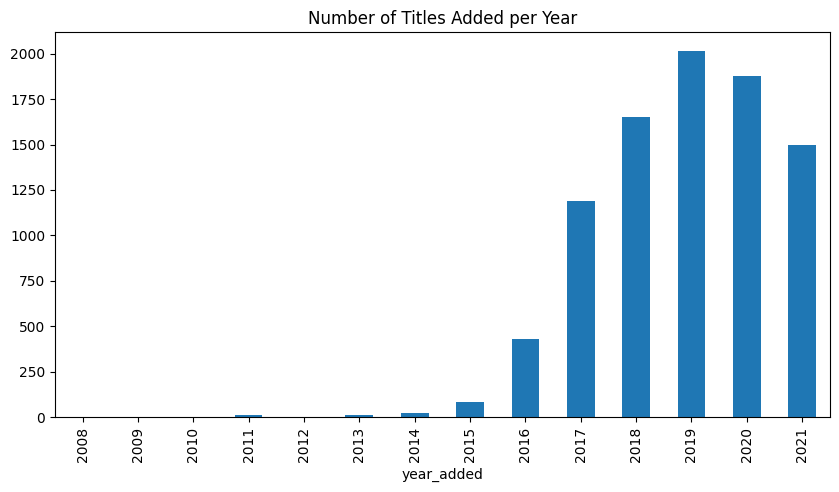

In [27]:
netflix_df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), title="Number of Titles Added per Year")

<Axes: title={'center': 'Number of Titles Added per Month'}, xlabel='month_added'>

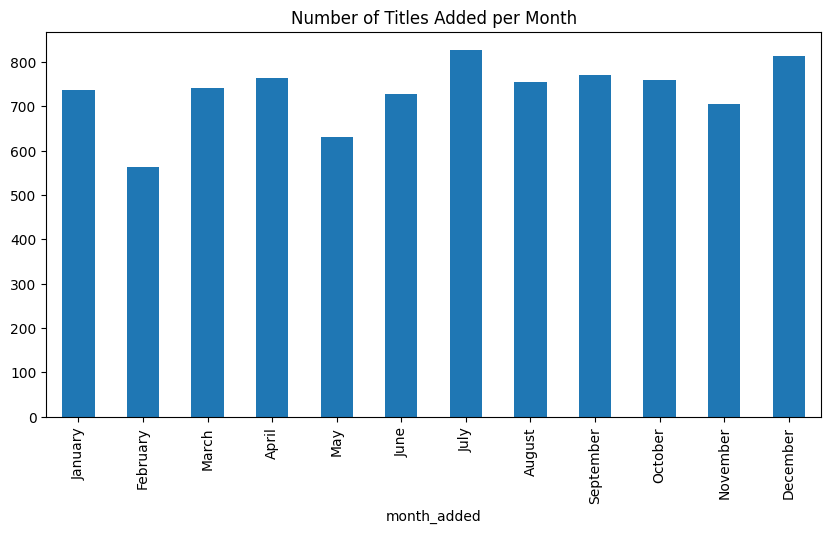

In [28]:
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Count the number of titles added per month
month_counts = netflix_df['month_added'].value_counts().sort_index()

# Map month numbers to month names
month_counts.index = month_counts.index.map(month_map)

# Plot the counts
month_counts.plot(kind='bar', figsize=(10,5), title="Number of Titles Added per Month")

<Axes: title={'center': 'Number of Titles Added per Day of Month'}, xlabel='day_added'>

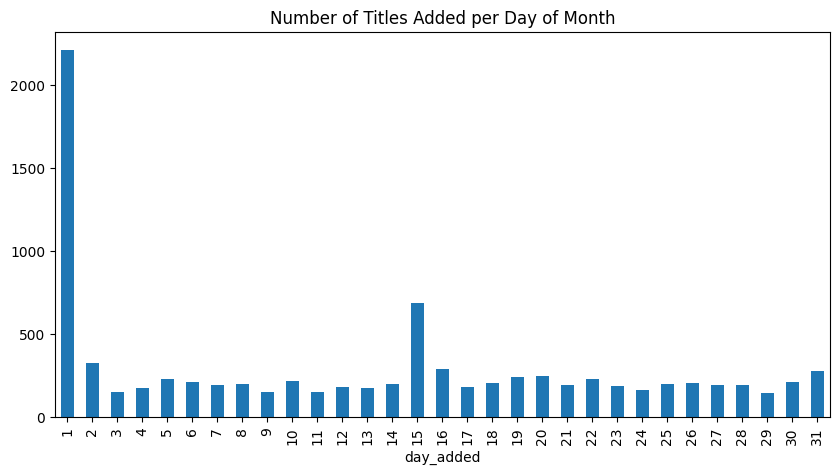

In [29]:
netflix_df['day_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), title="Number of Titles Added per Day of Month")

<Axes: title={'center': 'Movies vs TV Shows'}, xlabel='type'>

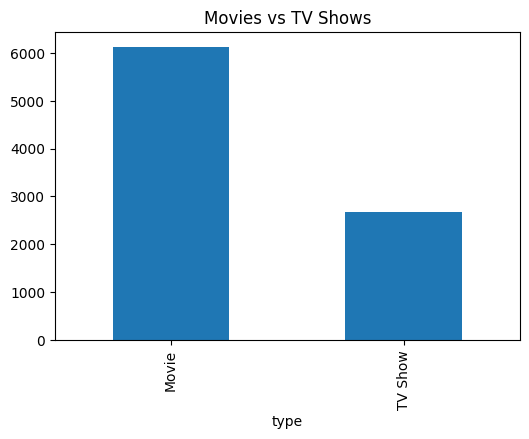

In [30]:
netflix_df['type'].value_counts().plot(kind='bar', title="Movies vs TV Shows", figsize=(6,4))


<Axes: title={'center': 'Top 10 Countries by Number of Titles'}, xlabel='country'>

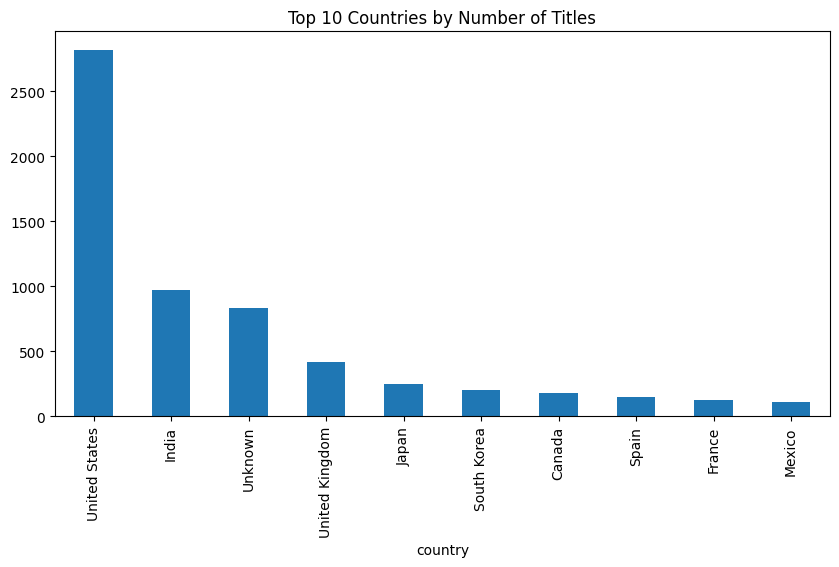

In [31]:
netflix_df['country'].value_counts().head(10).plot(kind='bar', title="Top 10 Countries by Number of Titles", figsize=(10,5))


<Axes: title={'center': 'Top 10 Netflix Genres'}, ylabel='Genre'>

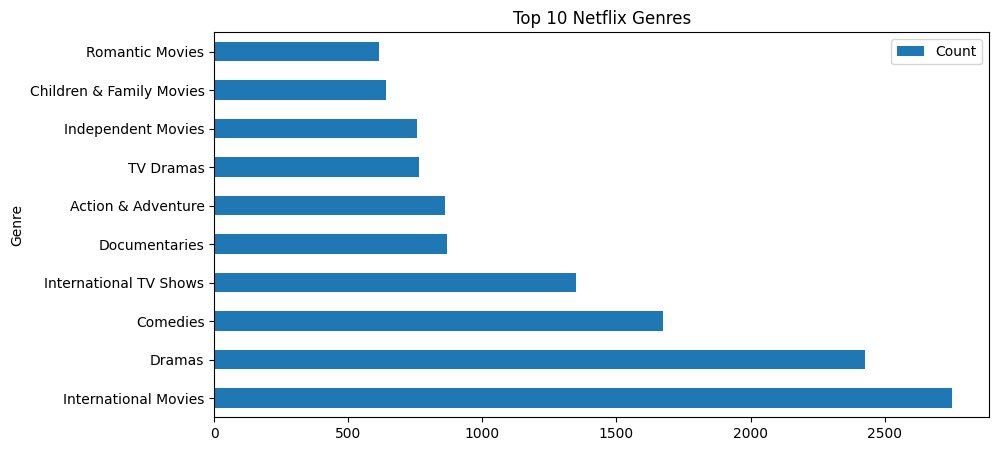

In [32]:
from collections import Counter
genres = ','.join(netflix_df['listed_in']).split(',')
genres = [g.strip() for g in genres]
genre_counts = Counter(genres)

# Vizualizácia
import pandas as pd
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
genre_df.head(10).plot(kind='barh', x='Genre', y='Count', title="Top 10 Netflix Genres", figsize=(10,5))


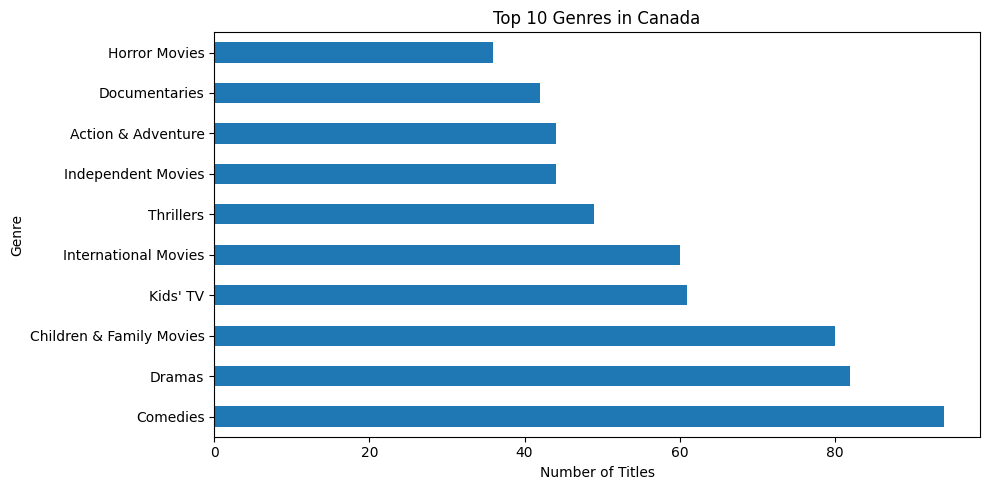

In [33]:
import matplotlib.pyplot as plt

# Explode genres
netflix_df['genre_split'] = netflix_df['listed_in'].str.split(', ')
df_genre = netflix_df.explode('genre_split')

# Explode countries
df_genre['country_split'] = df_genre['country'].str.split(', ')
df_genre = df_genre.explode('country_split')

# Group by country + genre
country_genre_counts = df_genre.groupby(['country_split', 'genre_split']).size().reset_index(name='count')

# Filter for a specific country
top_country = 'Canada'
df_top = country_genre_counts[country_genre_counts['country_split'] == top_country].sort_values(by='count', ascending=False).head(10)

# Plot
ax = df_top.plot(
    kind='barh',
    x='genre_split',
    y='count',
    figsize=(10,5),
    title=f"Top 10 Genres in {top_country}",
    legend=False
)
ax.set_xlabel("Number of Titles")
ax.set_ylabel("Genre")
plt.tight_layout()
plt.show()


In [34]:
netflix_df[['duration_int', 'duration_unit']] = netflix_df['duration'].str.extract(r'(\d+)\s*(\w+)')
netflix_df['duration_int'] = netflix_df['duration_int'].astype(float)


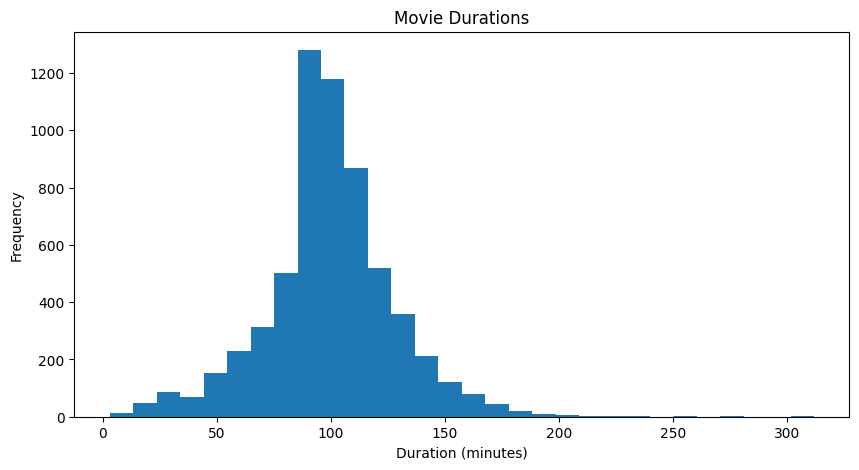

In [35]:
ax = netflix_df[netflix_df['duration_unit']=='min']['duration_int'].plot(
    kind='hist', bins=30, title="Movie Durations", figsize=(10,5)
)

ax.set_xlabel("Duration (minutes)")
ax.set_ylabel("Frequency")

plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_16952\3994092003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration_int'] = tv_shows['duration'].str.extract(r'(\d+)').astype(int)


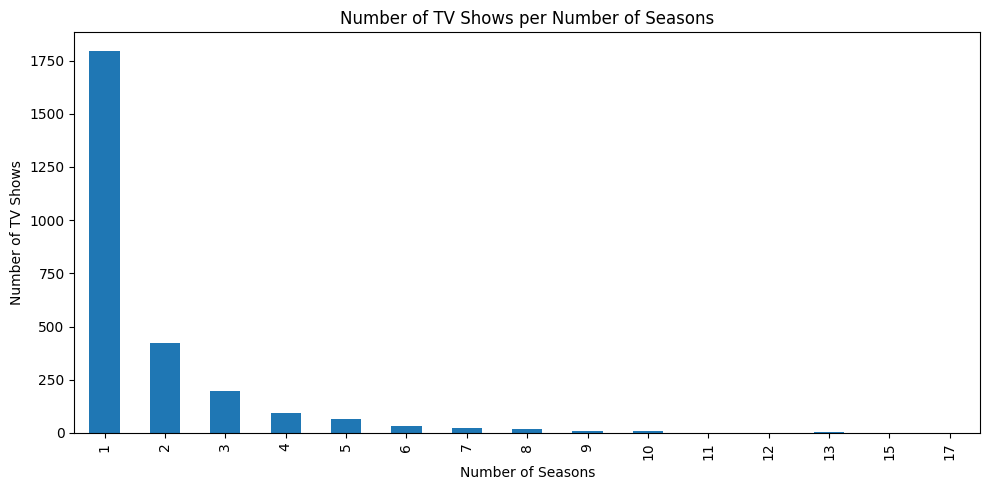

In [36]:

tv_shows = netflix_df[netflix_df['type'] == 'TV Show']

# Uisti sa, že duration_int je správne
tv_shows['duration_int'] = tv_shows['duration'].str.extract(r'(\d+)').astype(int)

# Bar plot počtu seriálov podľa počtu sezón
season_counts = tv_shows['duration_int'].value_counts().sort_index()

ax = season_counts.plot(
    kind='bar',
    figsize=(10, 5),
    title='Number of TV Shows per Number of Seasons'
)
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Number of TV Shows')


plt.tight_layout()
plt.show()


Top 10 central countries (by collaboration):
United States: 0.7797
United Kingdom: 0.5508
Germany: 0.4915
France: 0.4831
Canada: 0.3390
South Africa: 0.2712
Italy: 0.2627
Belgium: 0.2627
India: 0.2542
Denmark: 0.2458


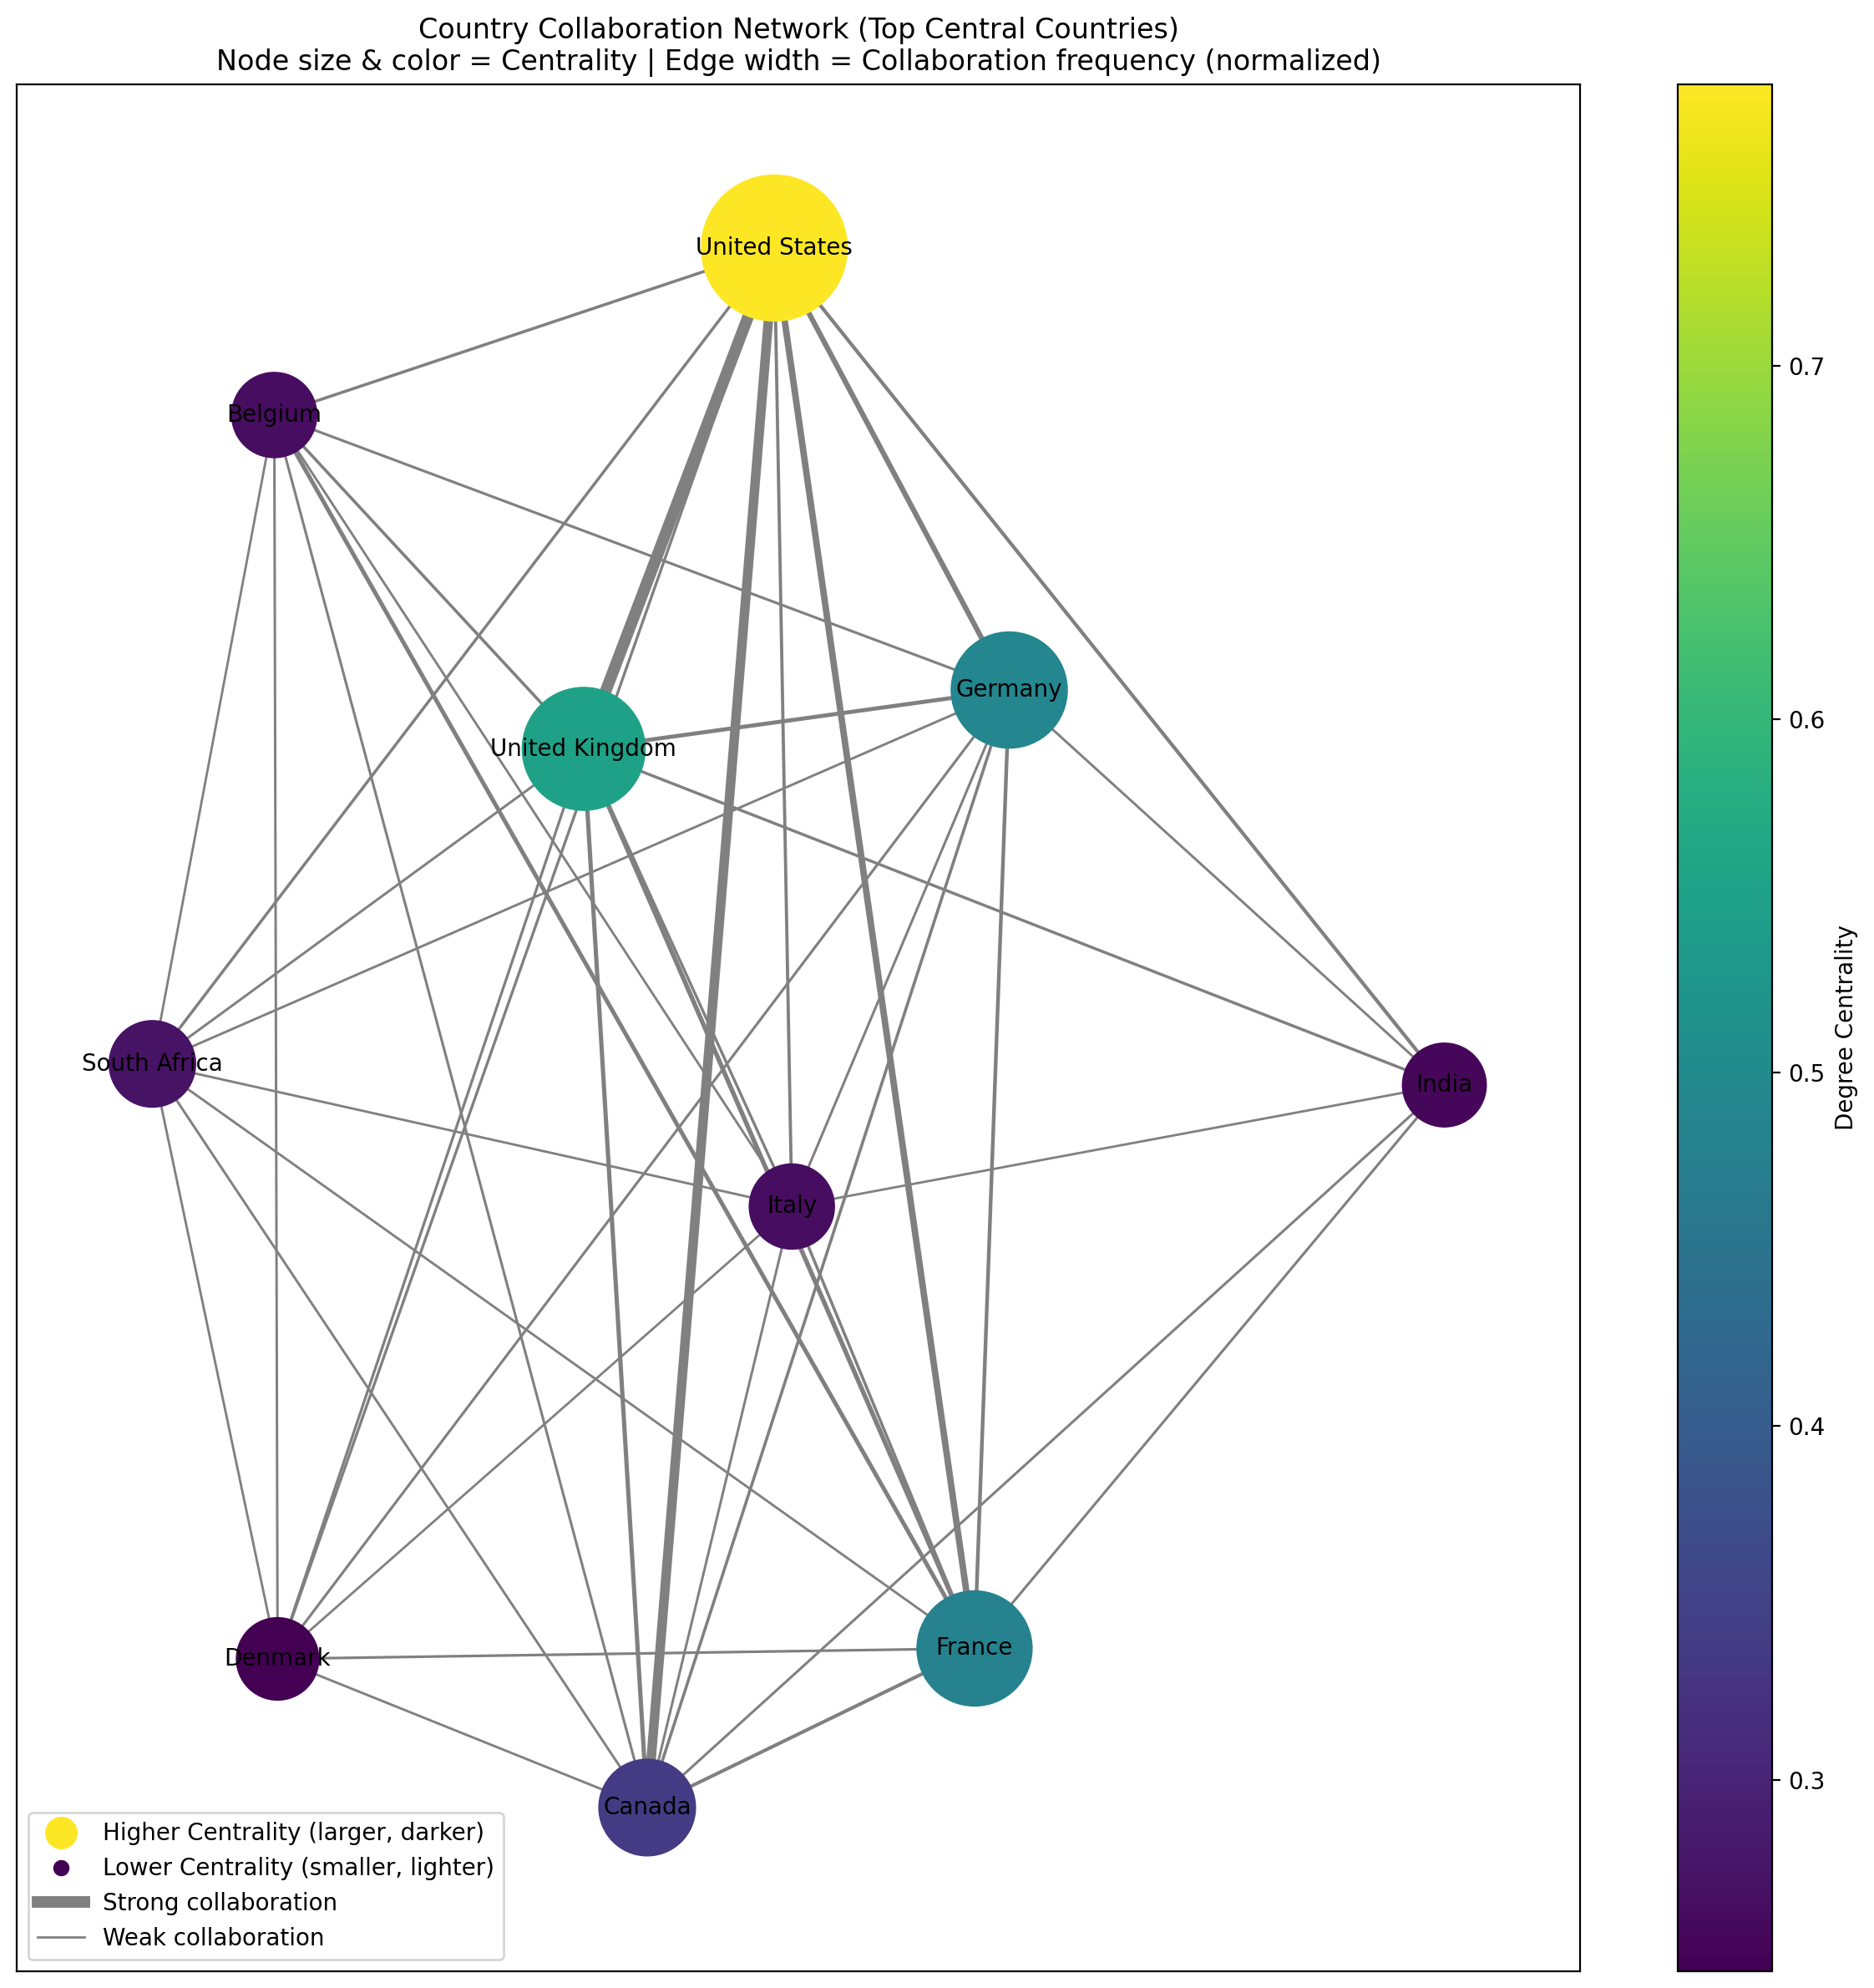

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl
from matplotlib.lines import Line2D

# Príprava dát
df_country = netflix_df.dropna(subset=['country']).copy()
df_country['country_list'] = df_country['country'].str.split(', ')

# Graf + počítanie spoluprác
G_c = nx.Graph()
edge_counter = Counter()

for countries in df_country['country_list']:
    if len(countries) > 1:
        for i in range(len(countries)):
            for j in range(i + 1, len(countries)):
                edge = tuple(sorted([countries[i], countries[j]]))
                G_c.add_edge(*edge)
                edge_counter[edge] += 1

# Degree centrality
centrality_c = nx.degree_centrality(G_c)

# Top centrálne krajiny
top_central_c = sorted(centrality_c.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 central countries (by collaboration):")
for country, cent in top_central_c:
    print(f"{country}: {cent:.4f}")

# Podgraf
top_nodes_c = [node for node, _ in top_central_c]
H_c = G_c.subgraph(top_nodes_c)

# Veľkosť, farba, hrúbka hrán
sizes = [5000 * centrality_c.get(node, 0.001) for node in H_c.nodes()]
colors = [centrality_c.get(node, 0.001) for node in H_c.nodes()]
weights = [edge_counter.get(tuple(sorted(edge)), 1) for edge in H_c.edges()]
max_weight = max(weights)
norm_weights = [1 + 4 * (w / max_weight) for w in weights]

# Vizualizácia
plt.figure(figsize=(12, 12), dpi=200)
pos = nx.spring_layout(H_c, k=0.5, seed=42)

nodes = nx.draw_networkx_nodes(
    H_c, pos,
    node_size=sizes,
    node_color=colors,
    cmap=plt.cm.viridis
)
nx.draw_networkx_edges(
    H_c, pos,
    width=norm_weights,
    edge_color='gray'
)
nx.draw_networkx_labels(H_c, pos, font_size=10)

plt.title("Country Collaboration Network (Top Central Countries)\nNode size & color = Centrality | Edge width = Collaboration frequency (normalized)")

# Colorbar pre uzly
cbar = plt.colorbar(nodes, label='Degree Centrality')

# Vlastná legenda
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Higher Centrality (larger, darker)',
           markerfacecolor=plt.cm.viridis(1.0), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Lower Centrality (smaller, lighter)',
           markerfacecolor=plt.cm.viridis(0.0), markersize=8),
    Line2D([0], [0], color='gray', lw=5, label='Strong collaboration'),
    Line2D([0], [0], color='gray', lw=1, label='Weak collaboration')
]
plt.legend(handles=legend_elements, loc='lower left')

plt.tight_layout()
# plt.savefig("country_collaboration_network_with_legend_fixed.png", dpi=300, bbox_inches='tight')
plt.show()


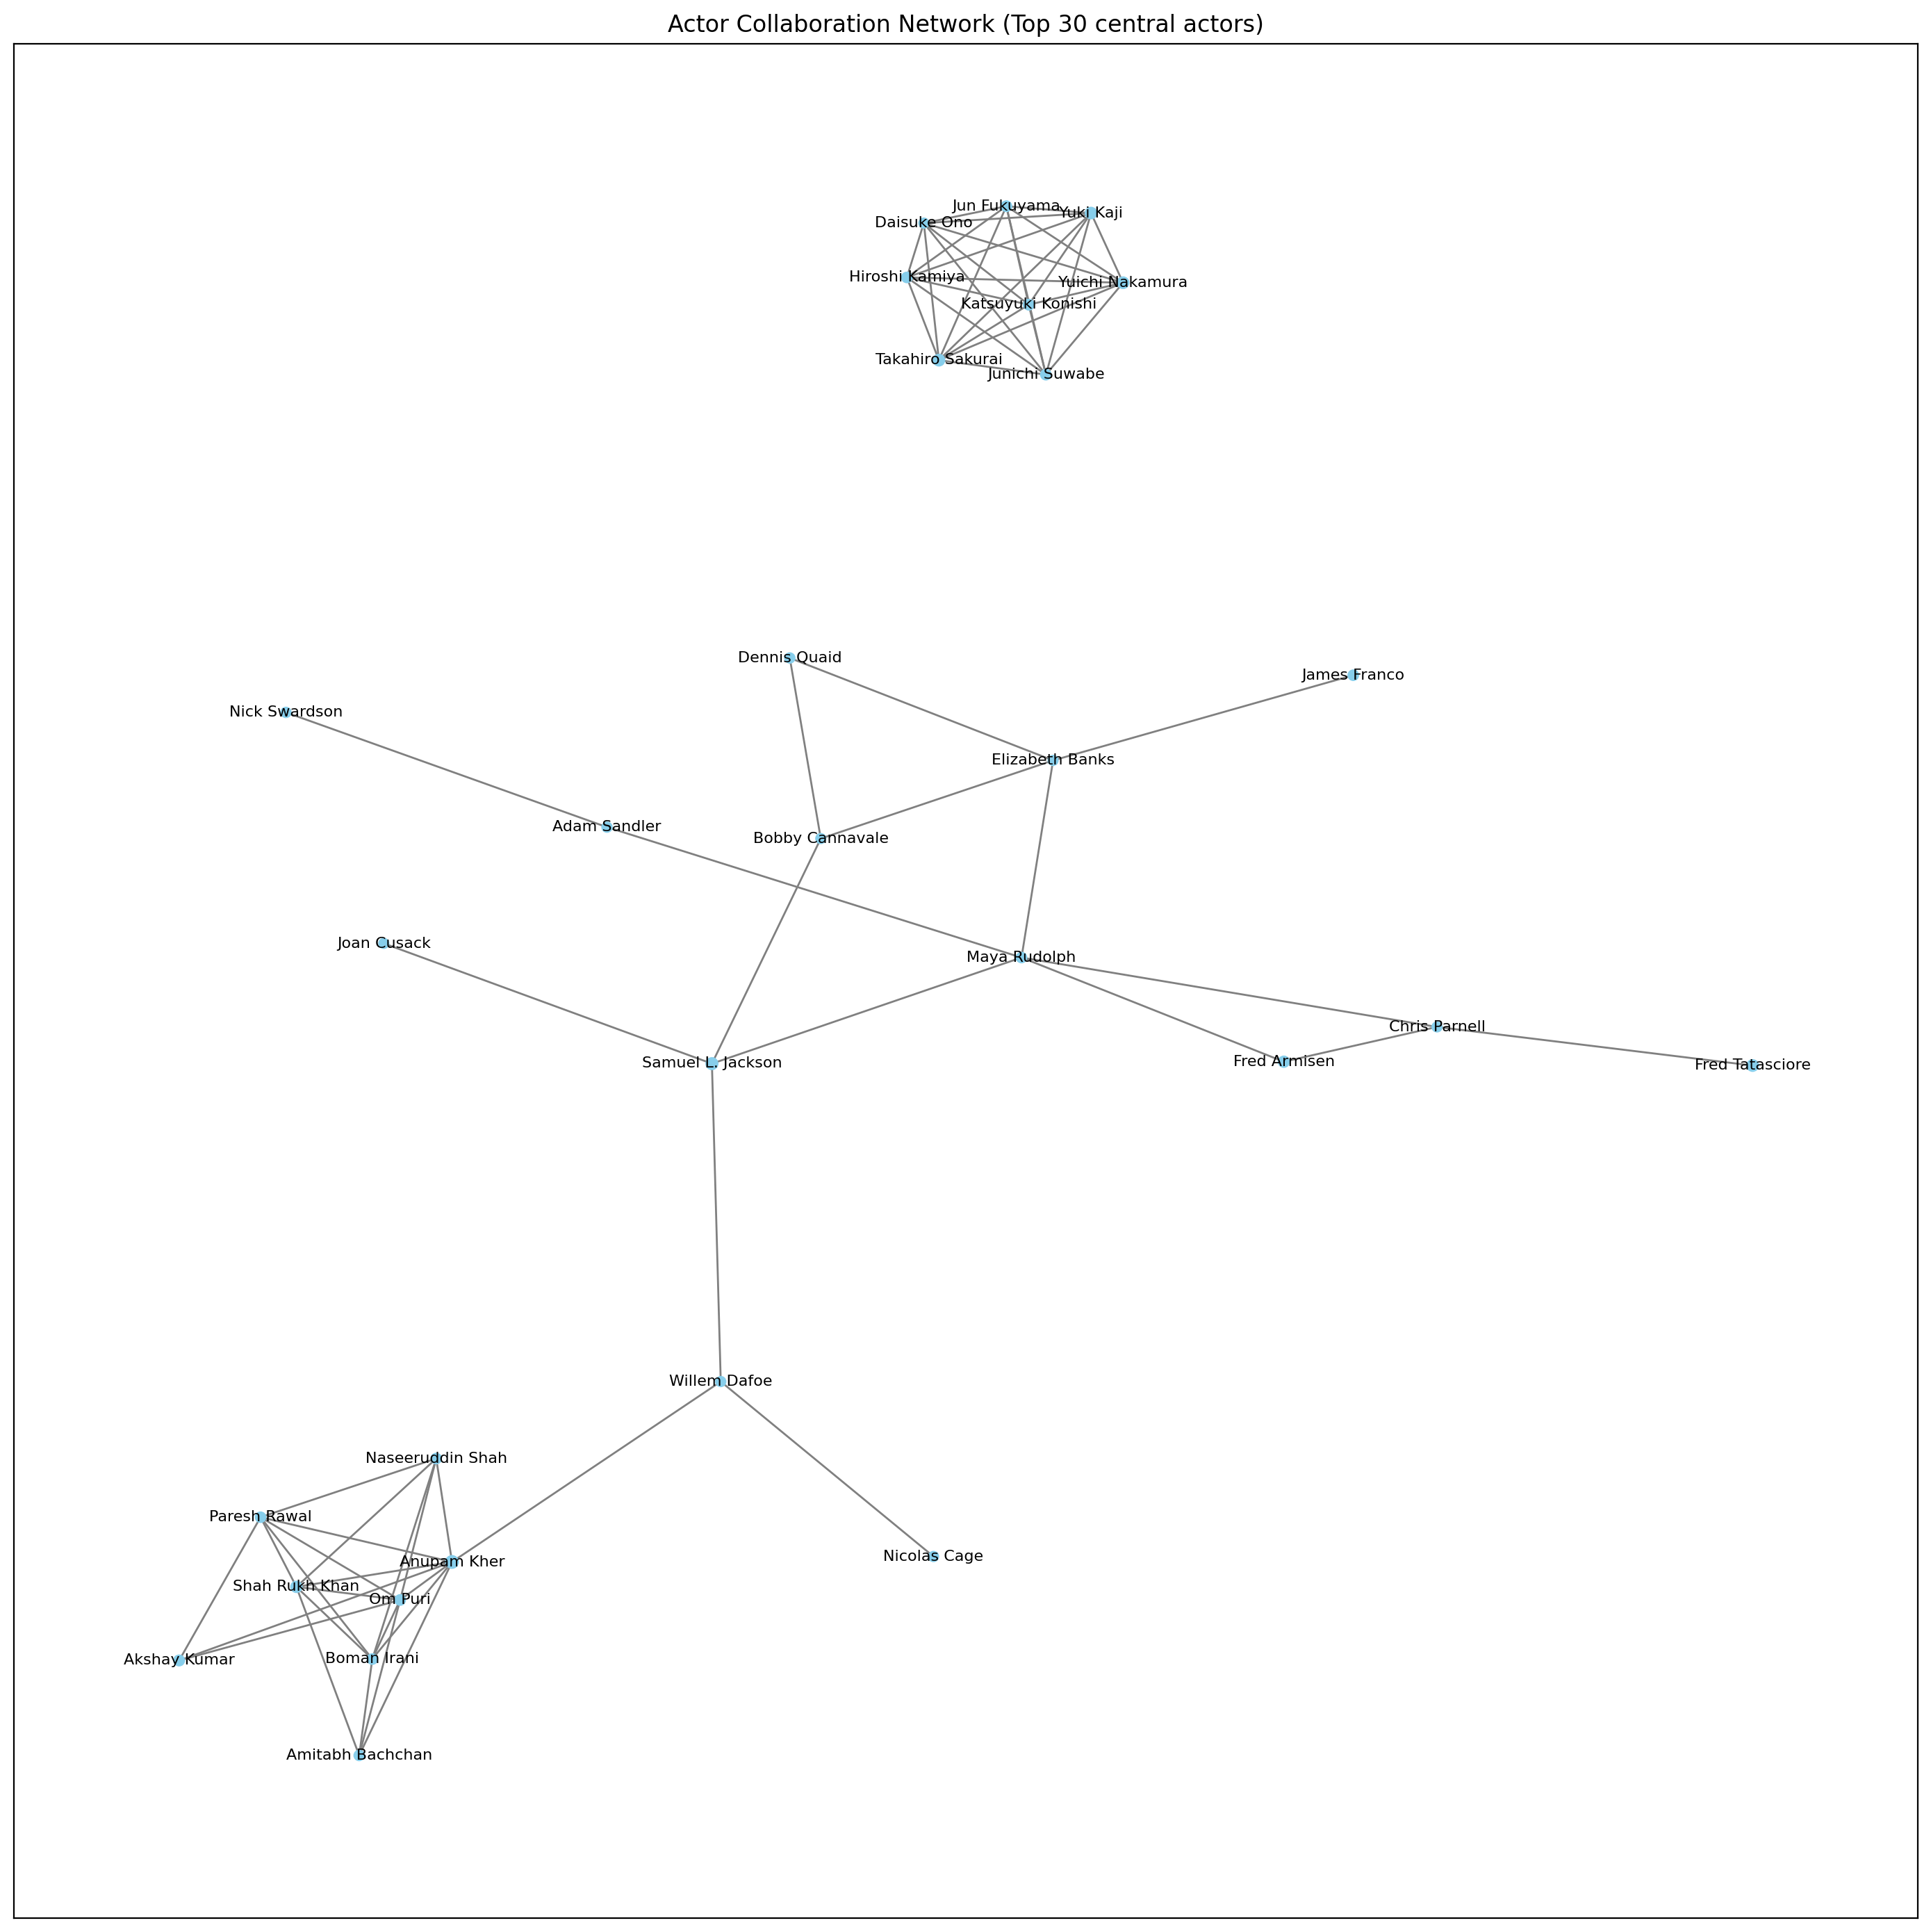

In [38]:
# Vyber len riadky s obsadením
df_cast = netflix_df.dropna(subset=['cast']).copy()

# Rozbi na zoznam hercov
df_cast['cast_list'] = df_cast['cast'].str.split(', ')

import networkx as nx

# Inicializácia grafu
G = nx.Graph()

# Pridaj hrany: každý pár hercov v rovnakom titule
for cast in df_cast['cast_list']:
    if len(cast) > 1:
        for i in range(len(cast)):
            for j in range(i + 1, len(cast)):
                G.add_edge(cast[i], cast[j])

# Degree centrality
centrality = nx.degree_centrality(G)

# Najcentrálnejší herci
top_central = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:20]

# Vyber podgraf okolo top 50 hercov
top_nodes = [node for node, _ in sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:30]]
H = G.subgraph(top_nodes)

# Vizualizácia
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 14), dpi=200)

# Stabilné a lepšie rozmiestnenie uzlov
pos = nx.spring_layout(H, k=0.4, seed=42)

# Veľkosť uzlov podľa centrality
sizes = [5000 * centrality.get(node, 0.001) for node in H.nodes()]

# Kresli sieť
nx.draw_networkx(
    H, pos,
    with_labels=True,
    node_size=sizes,
    font_size=8,
    edge_color='gray',
    node_color='skyblue'
)

plt.title("Actor Collaboration Network (Top 30 central actors)")
plt.tight_layout()
plt.show()


In [41]:

netflix_df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,genre_split,duration_int,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,[Documentaries],90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,"[International TV Shows, TV Dramas, TV Mysteries]",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,"[Crime TV Shows, International TV Shows, TV Ac...",1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,"[Docuseries, Reality TV]",1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,"[International TV Shows, Romantic TV Shows, TV...",2.0,Seasons
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,24,"[TV Dramas, TV Horror, TV Mysteries]",1.0,Season
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,24,[Children & Family Movies],91.0,min
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24,"[Dramas, Independent Movies, International Mov...",125.0,min
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,24,"[British TV Shows, Reality TV]",9.0,Seasons
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,24,"[Comedies, Dramas]",104.0,min
